### Setting up the environment

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import multivariate_normal
from scipy.ndimage import gaussian_filter1d

# Load model
from pyMBstat.HIM import HIM

# The Harmonic Interaction Model

### The N-body probabilty distribution function (PDF)

\begin{align} 
P_m &\equiv P(x_1,x_2,\ldots,x_m) = \int\left|\Psi\left(x_1,x_2,\ldots,x_N\right)\right|^2dx_{m+1}dx_{m+2}\cdots dx_N \\
&= \left(\frac{\delta_N}{\pi}\right)^{\frac{m}{2}}\left(\frac{N\omega}{(N-m)\omega +m\delta_N}\right)^{\frac{1}{2}}\exp\left(-\frac{1}{N}\left(\omega+(N-1)\delta_N\right)\sum_{i=1}^mx_i^2-\frac{2}{N}
\sum_{i<j}^mx_ix_j-C_m\left(\sum_{i=1}^mx_i\right)^2\right)
\end{align}


#### where
\begin{equation*}
C_m = -\frac{1}{N}\frac{(N-m)(\omega-\delta_N)^2}{(N-m)\omega + m \delta_N} 
\end{equation*}

### Probability "Chain Rule"

\begin{equation*}
P(x_1,x_2,\ldots,x_m) = P(x_1)P(x_2|x_1)\cdots P(x_m|x_1,x_2,\ldots,x_{m-1})
\end{equation*}

### The conditional probability

\begin{align} 
P(x_m|x_1,x_2,\ldots,x_{m-1}) &= \frac{P(x_1,x_2,\ldots,x_m)}{P(x_1,x_2,\ldots,x_{m-1})}= \frac{P_m}{P_{m-1}}\\ &= \left(\frac{\delta_N}{\pi}\right)^{\frac{1}{2}}\left(1 + \frac{\omega-\delta_N}{(N-m)\omega +m\delta_N}\right)^{\frac{1}{2}}\exp\left(-\frac{1}{N}(\omega+(N-1)\delta_N)x_m^2 -\frac{1}{N}x_m\sum_{i=1}^{m-1}x_i\right)\\
&\times\exp\left( -C_mx_m^2-2C_mx_m\sum_{i=1}^{m-1}x_i-\left(\sum_{i=1}^{m-1}x_i\right)^2\left(C_m-C_{m-1}\right) \right) \\
&= \frac{1}{\sqrt{2\pi\sigma_m^2}}\exp\left(-\frac{\left(x_m-\mu_m\right)^2}{2\sigma_m^2} \right)
\end{align}


#### where
\begin{equation*}
\mu_m = \frac{\omega-\delta_N}{(m-1)\delta_N+(1-m+N)\omega}\sum_{i=1}^{m-1}x_i 
\end{equation*}
\begin{equation*}
\sigma_m^2 = \frac{m(\delta_N-\omega)+N\omega}{2\delta_N\left((m-1)\delta_N+(1-m+N)\omega\right)} 
\end{equation*}

### The reduced one-body Density

\begin{align} 
\rho_{1}(x,x^\prime) &= N \left(\frac{\delta_NN\omega/\pi}{(N-1)\omega+\delta_N}\right)^{1/2}\exp\left(-a_1\left(x^2 + x^{\prime 2} \right)+a_2xx^\prime\right) \\
&= N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{1}{4}\left(a^2+b^2\right)\left(x^2 + x^{\prime 2} \right)-\frac{1}{2}\left(a^2-b^2\right)xx^\prime\right)\\
&= N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{ab}{2}\left(x^2 + x^{\prime 2} \right)\right)\exp\left(-\frac{1}{4}\left(a-b\right)^2\left(x^2 + x^{\prime 2} \right)-\frac{1}{2}\left(a^2-b^2\right)xx^\prime\right)\\
&= N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{ab}{2}\left(x^2 + x^{\prime 2} \right)\right) \\
&\times
\exp\left(-\frac{(a+b)^2}{4ab}\left(\left(\frac{a-b}{a+b}\right)^2\left((\sqrt{ab}r)^2 + (\sqrt{ab}r^{\prime})^2 \right)+2\left(\frac{a-b}{a+b}\right)(\sqrt{ab}x)(\sqrt{ab}x^\prime)\right)\right)\\
&=N \left(\frac{a^2}{\pi}\right)^{1/2}\exp\left(-\frac{\alpha^2}{2}\left(x^2 + x^{\prime 2} \right)\right)
\exp\left(-\frac{z^2}{1-z^2}\left((\alpha x)^2 + (\alpha x^{\prime})^2 \right)+\frac{2z}{1-z^2}(\alpha x)(\alpha x^\prime)\right)
\end{align}

#### where
\begin{align*}
a^2 &= 2a_1 - a_2 \\
b^2 &= 2a_1 + a_2 \\
z &= -\frac{a-b}{a+b} \\
\alpha &= \sqrt{ab}
\end{align*}

#### using Mehler's formula [1]

\begin{align*}
\exp\left(-\frac{z^2}{1-z^2}(t_1^2+t_2^2) + \frac{2z}{1-z^2}t_1t_2\right) = (1-z^2)^{1/2}\sum_{n=0}^{\infty}\frac{z^n}{2^nn!}H_n(t_1)H_n(t_2)
\end{align*}

#### the reduced one-body density reads

\begin{align*}
\rho_{1}(x,x^\prime) &= N \left(\frac{a^2}{\pi}\right)^{1/2}
(1-z^2)^{1/2}\sum_{n=0}^{\infty}\frac{z^n}{2^nn!}\exp\left(-\frac{\alpha^2 x^2}{2} \right)H_n(\alpha x)\exp\left(-\frac{\alpha^2 x^{\prime 2}}{2} \right)H_n(\alpha x^\prime)\\
&= N 
\sum_{n=0}^{\infty}(1-z)z^n\varphi_n(\alpha x)\varphi_n(\alpha x^\prime)
\end{align*}

#### where we have defined the natural orbitals

\begin{align*}
\varphi_n(\alpha x) &= \left(\frac{\alpha}{\sqrt{\pi}2^nn!}\right)^{1/2}\exp\left(-\frac{\alpha^2 x^2}{2} \right)H_n(\alpha x)
\end{align*}

[1] Peter D. Robinson J. Chem. Phys. 66, 3307, (1977).


In [2]:
system = HIM(N = 1000, omega = 1, Lambda = 1);
#system = HIM(N = 100, omega = 1, lambda0 = 0.01);
#print(system.__doc__)

--------------------------------------------------
            Harmonic Interaction Model            
--------------------------------------------------
Number of Bosons       = 1000      
omega                  = 1.000000  
delta_N                = 1.732629  
Ground state energy    = 865.948005
Uncondensed fraction   = 0.01%
Mean field interaction strength ( Lambda ) = 1.000000


### Preparing the Single-Shots

In [3]:
sshot,Psshot = system.singleshot_chainrule(numshots = 1000)

### Averaging all the Single-Shots produces the Boson Density

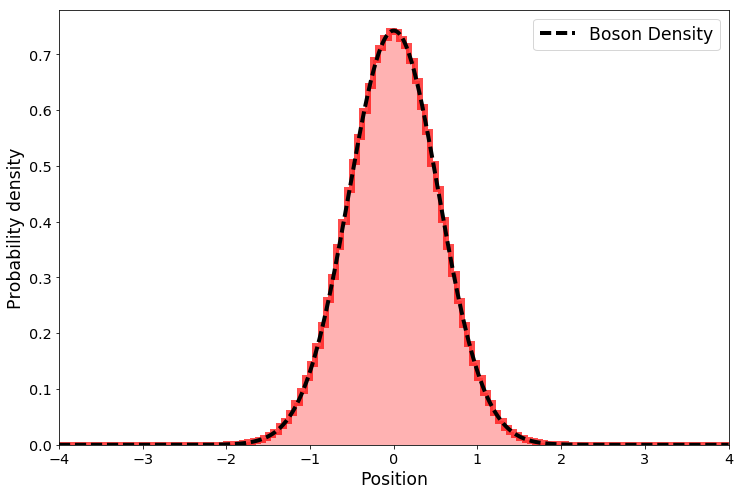

In [4]:
xmin = -4
xmax = 4
x = np.linspace(xmin,xmax,512,endpoint=True)
num_bins = 128
plt.subplots(figsize = (12,8))
plt.hist(sshot.ravel(),normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.7, linewidth = 6, 
         color = 'r', histtype = 'step');
plt.hist(sshot.ravel(),normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.3, linewidth = 0, 
         color = 'r', histtype = 'bar');
plt.plot(x,  system.rho1(x), linewidth = 4, color = 'k',linestyle='--', label='Boson Density');
plt.legend(fontsize = 'xx-large');
plt.xlabel('Position',fontsize = 'xx-large');
plt.ylabel('Probability density',fontsize = 'xx-large');
plt.xticks(fontsize = 'x-large');
plt.yticks(fontsize = 'x-large');
plt.xlim((xmin,xmax));

### Looking at one Single-Shot

Provided the number of particles is sufficiently large, comparing a single-shot to the boson density the level of condensation can be estimated. For fully condensed systems, a single-shot samples the density and so they should be the close even without averaging many single-shots. 

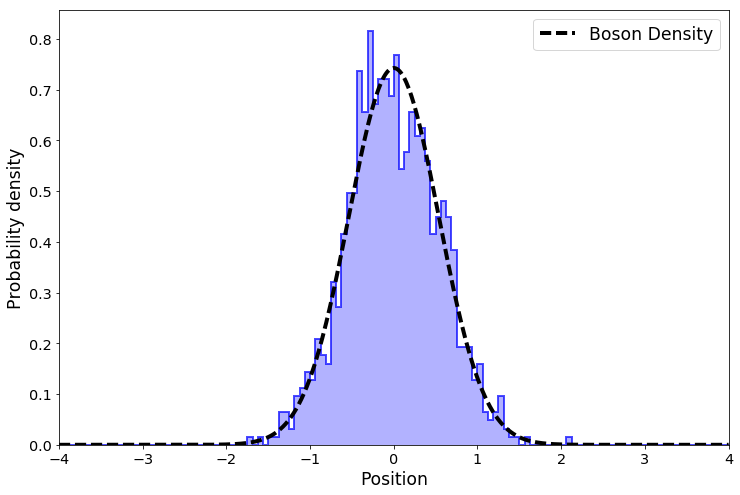

In [5]:
num_bins = 128
H = np.zeros((sshot.shape[0],num_bins))
plt.subplots(figsize = (12,8))
# Selecting a random single-shot
shot = sshot[np.random.randint(sshot.shape[0]),:];
plt.hist(shot,normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.7, linewidth = 2, 
         color = 'b', histtype = 'step');
plt.hist(shot,normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.3, 
         color = 'b', histtype = 'bar');
plt.plot(x,  system.rho1(x), linewidth = 4, color = 'k',linestyle='--', label='Boson Density');
plt.legend(fontsize = 'xx-large');
plt.xlabel('Position',fontsize = 'xx-large');
plt.ylabel('Probability density',fontsize = 'xx-large');
plt.xticks(fontsize = 'x-large');
plt.yticks(fontsize = 'x-large');
plt.xlim((xmin,xmax));

### Constructing an image representation of a batch of single-shots

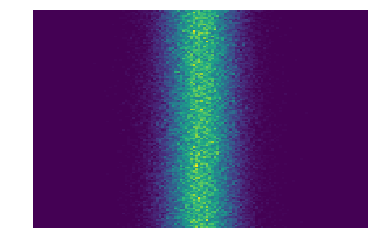

In [6]:
image = system.make_sshot_image(sshot, xlim = (xmin,xmax))
plt.imshow(image, aspect= 'auto'); 
plt.axis('off');

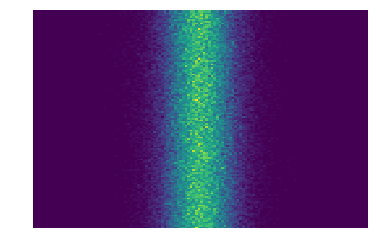

In [7]:
image = system.make_sshot_image(sshot, xlim = (xmin,xmax))
plt.pcolor(image); 
plt.axis('off');

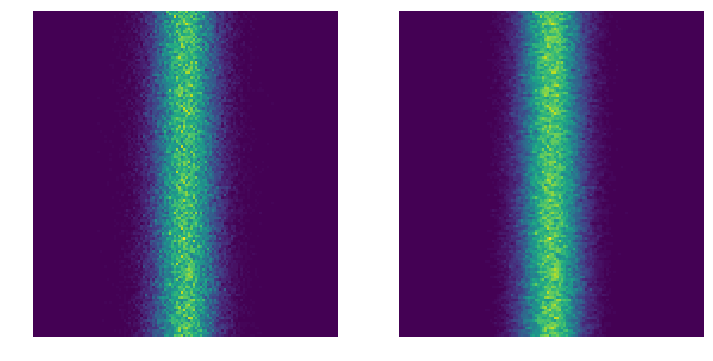

In [136]:
image = system.make_sshot_image(sshot, xlim = (xmin,xmax), image_size=128)
conv_image = gaussian_filter1d(image, sigma = 9 * (xmax-xmin) / num_bins, order=0, axis = 1)
fig, axs = plt.subplots(1,2,figsize = (12,6))
axs[0].imshow(image, aspect= 'auto'); 
axs[0].axis('off');
axs[1].imshow(conv_image, aspect= 'auto'); 
axs[1].axis('off');

In [123]:
conv_image[0,:]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  3,  0,  4,  5,  8, 11, 11, 12, 12,
       23, 15, 13, 27, 23, 42, 38, 40, 38, 29, 44, 59, 38, 49, 39, 43, 41,
       35, 39, 44, 39, 26, 11, 19, 16, 20, 14,  9,  7,  5,  4,  4,  1,  2,
        2,  2,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int16)

In [124]:
image[0,:]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  2,  1,  4,  0,  5,  5,  8, 12, 11, 13, 12,
       24, 15, 13, 28, 23, 43, 38, 41, 39, 29, 44, 60, 38, 50, 39, 44, 42,
       35, 39, 45, 40, 27, 11, 20, 16, 21, 14,  9,  7,  5,  4,  5,  1,  3,
        2,  2,  2,  1,  2,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int16)

In [135]:
x = np.zeros((9))
x[4] = 1
np.count_nonzero(gaussian_filter1d(x, sigma = 0.5625, order=0))


5

In [134]:
9 * (xmax-xmin) / num_bins

0.5625

In [106]:
np.sum(conv_image, axis=1)

array([977, 976, 980, 972, 975, 977, 974, 973, 976, 972, 975, 975, 973,
       977, 976, 980, 978, 977, 972, 976, 975, 973, 971, 972, 975, 973,
       973, 979, 980, 975, 973, 973, 978, 974, 976, 979, 976, 979, 974,
       977, 974, 976, 974, 981, 975, 980, 972, 975, 978, 971, 977, 975,
       973, 976, 978, 979, 971, 978, 972, 972, 972, 973, 975, 973, 975,
       972, 974, 975, 973, 975, 974, 973, 971, 975, 973, 978, 977, 973,
       978, 976, 972, 976, 977, 976, 975, 973, 978, 976, 973, 977, 977,
       977, 974, 975, 972, 974, 975, 976, 972, 979, 975, 973, 973, 973,
       975, 973, 976, 975, 978, 975, 975, 974, 975, 973, 977, 975, 978,
       977, 973, 972, 974, 973, 974, 970, 972, 973, 972, 973])

### Constructing an image representation of all single-shots

In [8]:
num_bins = 128
sshot_image = np.zeros((sshot.shape[0],num_bins))
for ind in range(sshot.shape[0]): 
    sshot_image[ind,:], edges = np.histogram(sshot[ind,:], normed = 0, bins = num_bins, range=[xmin, xmax])
sshot_image = sshot_image.astype(np.int16)

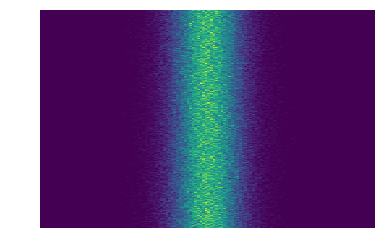

In [9]:
#plt.subplots(figsize = (20,200));
plt.imshow(sshot_image[:,:], aspect= 'auto'); 
plt.axis('off');

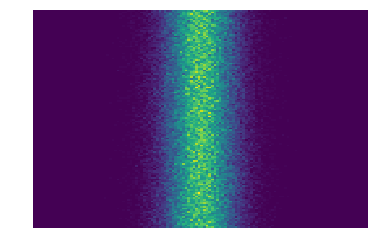

In [10]:
image = sshot_image[np.random.randint(sshot.shape[0], size = 128),:]
plt.imshow(image, aspect= 'auto'); 
plt.axis('off');

In [11]:
def process_single_shots(sshots, observable = 'position'):
    N = sshots.shape[1]
    if observable == 'position':
        sshots = np.sum(sshots, axis = 1) / np.sqrt(N)
    elif observable == 'cm':
        sshots = np.sum(sshots, axis = 1) / N
    return sshots
Xshot = process_single_shots(sshot, observable = 'position')
#Xshot = process_single_shots(sshot, observable = 'cm')

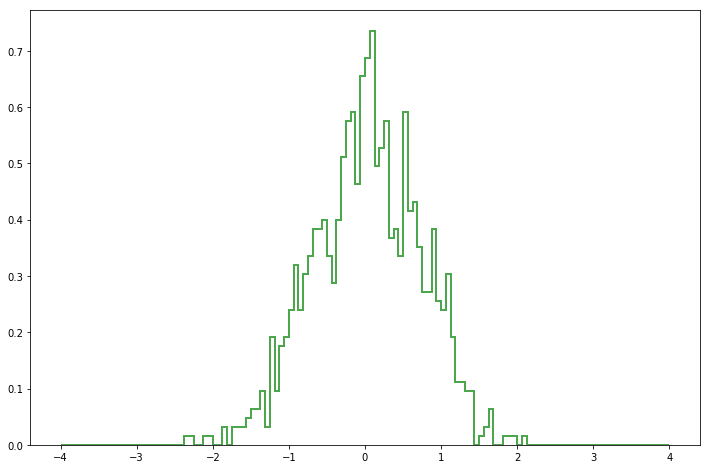

In [12]:
plt.subplots(figsize = (12,8));
plt.hist(Xshot,normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.7, linewidth = 2, 
         color = 'g', histtype = 'step');

In [13]:
Xshot = system.process_single_shots(sshot, observable = 'position')


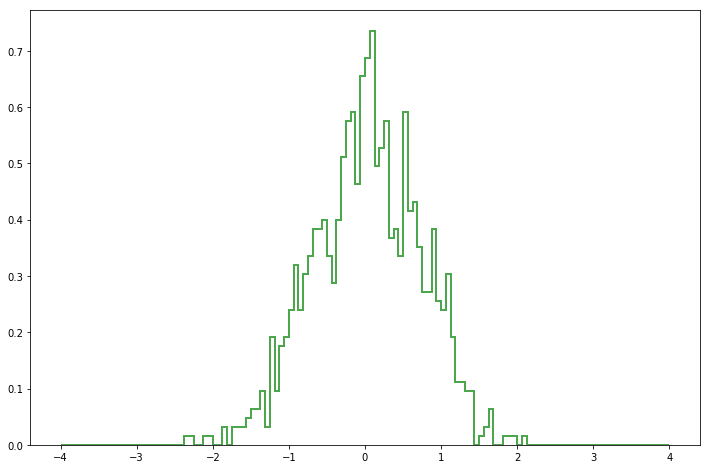

In [14]:
plt.subplots(figsize = (12,8));
plt.hist(Xshot,normed = 1, bins = num_bins, range=[xmin, xmax], alpha = 0.7, linewidth = 2, 
         color = 'g', histtype = 'step');

In [15]:
np.sum(image[0,:])

1000

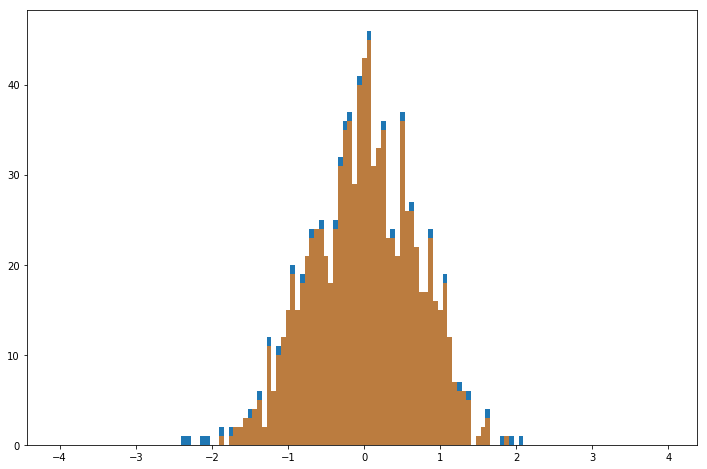

In [53]:
#xmin = -4
#xmax = 4
#x = np.linspace(xmin,xmax,num_bins,endpoint=True)
#dx = x[1]-x[0]
#sigma = 3 * dx
#gaussian = np.exp(-(x/sigma)**2/2) / np.sqrt(2*np.pi*sigma**2)
h, edges = np.histogram(Xshot, normed = 0, bins = num_bins, range=[xmin, xmax])
result = gaussian_filter1d(h, sigma = 3 * 0.0625, order=0)
#result = np.convolve(h, gaussian, mode="full")
plt.subplots(figsize = (12,8));
plt.bar(edges[0:-1], h, width = np.diff(edges));
plt.bar(edges[0:-1], result, width = np.diff(edges), alpha = 0.7);

In [40]:
np.diff(edges)

array([ 0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,  0.0625,
        0.0625,  0.0

In [59]:
result-h

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0,
       -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  0, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,
        0, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)